Training Model using celebrity person images using opencv haarcascade method and wavelet transformation

In [15]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

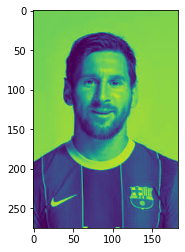

In [52]:
img = cv2.imread('Data/messi/download (11).jpg')

# For using harcascade the image should be tranformed to gray image.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.figure()
plt.imshow(gray)

In [53]:
face_harcascade = cv2.CascadeClassifier('haarcascades_face.xml') # This is face_harcascase xml file used to detect number of faces in image

face = face_harcascade.detectMultiScale(gray, 1.3, 2)

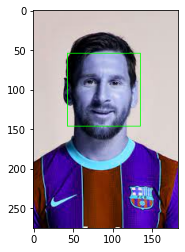

In [54]:
(x, y, w, h) = face[0] # Harcascade gives four points where face is located in image
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 1) # Using points creating x,y co-ordinates to draw rectangle in image
plt.figure()
plt.imshow(face_img)

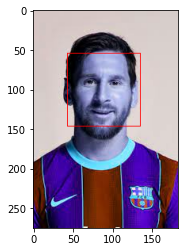

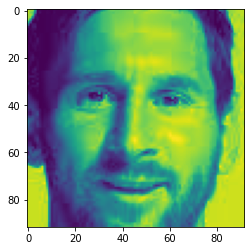

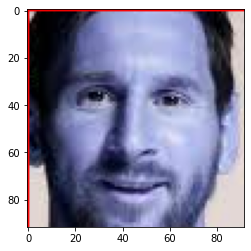

In [55]:
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1) # Image where face is detected using rectangle
    roi_gray = gray[y:y+h, x:x+w] # Region of interest where face is located in gray.
    roi_color = face_img[y:y+h, x:x+w] # Region of interest where face is located in colour.
        
plt.figure()
plt.imshow(face_img)
plt.figure()
plt.imshow(roi_gray)
plt.figure()
plt.imshow(roi_color)


In [20]:
def get_cropped_image(image_path): # Defining a function to read cropped image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_harcascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color

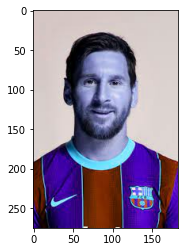

In [21]:
original_image = cv2.imread('Data/messi/download (11).jpg')
plt.imshow(original_image)

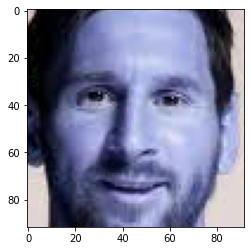

In [22]:
cropped_image = get_cropped_image('Data/messi/download (11).jpg')
plt.imshow(cropped_image)

In [23]:
path_to_data = "./Data/"
path_to_cr_data = "./Data/cropped/"

In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        
img_dirs

['./Data/cropped',
 './Data/john_cena',
 './Data/messi',
 './Data/ronaldo',
 './Data/virat']

In [25]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # Splitting the path and grabbing last item which is celebrity name
    print(celebrity_name) #Printing the name
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
john_cena
Generating cropped images in folder:  ./Data/cropped/john_cena
messi
Generating cropped images in folder:  ./Data/cropped/messi
ronaldo
Generating cropped images in folder:  ./Data/cropped/ronaldo
virat
Generating cropped images in folder:  ./Data/cropped/virat


In [27]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'john_cena': ['./Data/cropped/john_cena\\john_cena1.png',
  './Data/cropped/john_cena\\john_cena10.png',
  './Data/cropped/john_cena\\john_cena11.png',
  './Data/cropped/john_cena\\john_cena12.png',
  './Data/cropped/john_cena\\john_cena13.png',
  './Data/cropped/john_cena\\john_cena14.png',
  './Data/cropped/john_cena\\john_cena15.png',
  './Data/cropped/john_cena\\john_cena16.png',
  './Data/cropped/john_cena\\john_cena17.png',
  './Data/cropped/john_cena\\john_cena18.png',
  './Data/cropped/john_cena\\john_cena19.png',
  './Data/cropped/john_cena\\john_cena2.png',
  './Data/cropped/john_cena\\john_cena3.png',
  './Data/cropped/john_cena\\john_cena4.png',
  './Data/cropped/john_cena\\john_cena5.png',
  './Data/cropped/john_cena\\john_cena6.png',
  './Data/cropped/john_cena\\john_cena7.png',
  './Data/cropped/john_cena\\john_cena8.png',
  './Data/cropped/john_cena\\john_cena9.png'],
 'messi': ['./Data/cropped/messi\\messi1.png',
  './Data/cropped/messi\\messi10.png',
  './Data/croppe

In [29]:
class_dict = {} # Creating a dictionary with celebrity names and numbers
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'john_cena': 0, 'messi': 1, 'ronaldo': 2, 'virat': 3}

In [30]:
import pywt

def w2d(img, mode='haar', level=1): # Converting image to wavelet transformed Image
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

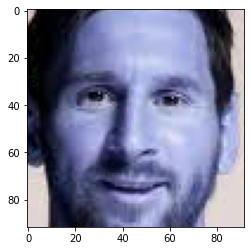

In [31]:
cropped_image = get_cropped_image('Data/messi/download (11).jpg')
plt.imshow(cropped_image)

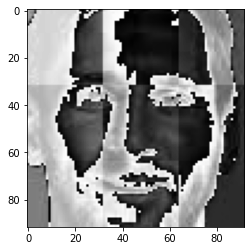

In [32]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [33]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

C:\Users\bhara\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [34]:
len(X[0])

4096

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(66, 4096)

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.47058823529411764

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.00      0.00      0.00         3
           2       0.33      0.60      0.43         5
           3       1.00      0.25      0.40         4

    accuracy                           0.47        17
   macro avg       0.48      0.41      0.37        17
weighted avg       0.50      0.47      0.42        17



C:\Users\bhara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.715556,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.555556,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.775556,{'logisticregression__C': 1}


In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
best_estimators['svm'].score(X_test,y_test)

0.47058823529411764

In [44]:
best_estimators['random_forest'].score(X_test,y_test)

0.5882352941176471

In [45]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6470588235294118

In [46]:
best_clf = best_estimators['logistic_regression']

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 1, 0, 0],
       [0, 1, 2, 0],
       [0, 1, 4, 0],
       [1, 0, 1, 2]], dtype=int64)

In [48]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.33      0.33      0.33         3
           2       0.57      0.80      0.67         5
           3       1.00      0.50      0.67         4

    accuracy                           0.65        17
   macro avg       0.68      0.61      0.62        17
weighted avg       0.70      0.65      0.65        17



Text(69.0, 0.5, 'Truth')

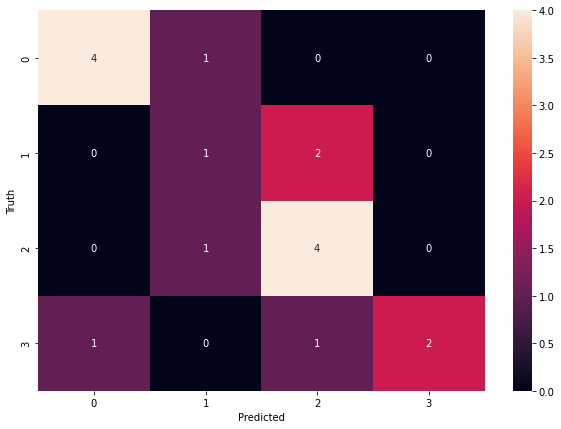

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'john_cena': 0, 'messi': 1, 'ronaldo': 2, 'virat': 3}